<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/Projects/Air_quality_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air quality mini-project

Air pollution issue has been one of the biggest issue in the whole wide world. Air pollution can cause both short term and long term effects on health and many people are concerned about pollution in the air that they breathe. 


The Air Quality Index in this project is focusing on Nitrogen Dioxide (NO2). It will be worthy to analyse the data and predict the trend. 

More information I've found :
https://ourworldindata.org/air-pollution

https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/ambient-air-pollution

https://oxfordshire.air-quality.info/why-air-quality-is-important#:~:text=It%20provides%20air%20quality%20standards,the%20air%20that%20they%20breathe.

https://www.iqair.com/world-air-quality-ranking
https://waqi.info/

# Aim

In this project, I will be cleaning and wrangling air quality data to have some basic statistics calculations and summary of statistics. In addition, there will be analyse current and predicted trends by using Linear Regression model and visualisation for the final data. 

# About the data

There are two set of air quality data that measured based on NO2 at Chatham Roadside area between 2020 and 2021. 


## Data Source
The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The dataset can be accessed here: https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA This is a .csv file

There is a second data set here covering the year 2021: https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ




## The data contains:
* a heading line (Chatham Roadside) which needs to be skipped
* dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)
* times which are not all in the same format
* Nitrogen Dioxide levels which are, again, text and sometimes contain nodata
* Status which is always the same





There are 4 columns in the csv file :
Date, Time, Nitrogen dioxide, Status 

# Project - clean, sort and wrangle the data

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with nodata in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column  

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA This is a .csv file  

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

## Importing Packages
Import the modules / libraries that I need for this project.The pandas library is imported for data handling. Numpy for array handling.  SciPy for linear regression. Matplotlib for plotting. However, the last line of the package importing block (%matplotlib inline) is not necessary for standalone python script. 

In [179]:
from google.colab import files
import io

import pandas as pd
import numpy as np
from datetime import datetime, time

from scipy.stats import linregress
import scipy.stats as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Retrieval

This get_data() function is using for retrieve data from a csv file by passing in a url parameter.  Pandas .read_csv() function imports all data from a csv file. If your data is in another format, there are various other functions available in pandas library. 



In [112]:
def get_data(url):
  df = pd.read_csv(url,skiprows = 1) # skip the first row which is a title
  return df 
  # upload a set of chosen files then read a specified file
  #uploaded = files.upload()
  #df = pd.read_excel(uploaded['air_quality.xlsx'],sheet_name="NO2-measured-data-2020-2021")
  #df = pd.read_csv(uploaded['air_quality_data.csv'])
  #os.chdir("smb://ZGEMMAH2H._smb._tcp.local/Harddisk/SDS Code Division_Python/")
  #df = pd.read_excel("air_quality.xlsx")

  #uploaded = files.upload()
  #df = pd.read_csv(io.BytesIO(uploaded['air_quality.xlsx']))
#program starts here  
url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/NO2-measured-data-2020-Rochester-Stoke.csv"
df = get_data(url)


## Inspect Data

Let's have a look some details about the dataset.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8784 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.6+ KB


Have a look the top 5 and bottom 5 rows of this dataset. 

In [114]:
display(df.head())
display(df.tail())


,Date,Time,Nitrogen dioxide,Status
0,01/01/2020,1:00,35.65193,V µg/m³
1,01/01/2020,2:00,37.99122,V µg/m³
2,01/01/2020,3:00,35.70462,V µg/m³
3,01/01/2020,4:00,36.5796,V µg/m³
4,01/01/2020,5:00,32.9441,V µg/m³


,Date,Time,Nitrogen dioxide,Status
8779,31/12/2020,20:00,11.22419,V µg/m³
8780,31/12/2020,21:00,11.17037,V µg/m³
8781,31/12/2020,22:00,9.54137,V µg/m³
8782,31/12/2020,23:00,8.21683,V µg/m³
8783,31/12/2020,24:00:00,8.16537,V µg/m³


I will check if it contains any missing data.  

In [115]:
df.isnull().values.any()

False

This any_nulls() function is passing in a dataframe and returning if each column contains null values in boolean values True or False. 

In [116]:
#find any null values for each column
def any_nulls(df):
  df_null = df.isna().any()
  return df_null

null_values = any_nulls(df)
print(null_values)

Date                False
Time                False
Nitrogen dioxide    False
Status              False
dtype: bool


## Clean, Sort and Wrangle the data

This is always the most important part of the whole process before starting any project. This function will be reusing later for 2nd dataset.

I notice the data needs to be cleaned and formated. 

The data type of Date and Time columns are not datetime, so we will need to convert them into datatime type. 

Some of the times have hour, minute and second but some only have hour and minute. 

We need to drop rows / columns that have no data or duplicates.

Nitrogen dioxide columns has float type of data, so we will need to convert them to float type. 

Status columns contains only the unit of the Nitrogen dioxide values. We won't need to analynise this column, so it can be dropped. 

The rests are creating more useful data columns, rename, and sorting. 


### Clean, Format, Sort, wrangle 

This function process_data() is responsible for cleaning, formating , sorting and wrangling data by passing in the dataframe.

We should make the Date column as index column. For time series data it is very important to make the index column as date.

There's no null value in this dataset. If there's null value, you can use df.dropna(subset = ["col1", "col2"]) to drop rows where NA/NaN values exist in specific columns.  However, there's rows in Nitrogen dioxide column showing 'nodata', we will need to drop off the rows. 

What I did in this function: 


*   Convert Date to datetime type
*   Convert Time to datetime type, Remove Time contains '24:00:00'/'24:00'
*   Convert Nitrogen dioxide to float type, remove if any contains 'nodata', sort values by this column, Rename to 'NO2 Level (V ug/m2)'
*   Create new columns 'Weekdays' and 'Years', Drop off 'Status'


In [117]:
def process_data(df): 
  # Convert dates to date format
  df['Date'] = pd.to_datetime(df['Date'])
  # df.set_index('Date', inplace=True) # added for linear regression
  # drop rows Time with 24
  indexTimes = df[(df['Time'] == '24:00:00')  | (df['Time'] == '24:00') ].index
  df.drop(indexTimes , inplace=True) 
  df["Time"]= pd.to_datetime(df["Time"]).dt.time

  # Drop a row by condition : Delete these row indexes from dataFrame
  indexNames = df[df['Nitrogen dioxide'] == 'nodata'].index  
  df.drop(indexNames , inplace=True) 

  #Convert the Nitrogen dioxide levels values to float type
  df['Nitrogen dioxide']=  df['Nitrogen dioxide'].astype(float)

  #Sort by Nitrogen dioxide level
  df.sort_values(by=['Nitrogen dioxide'])

  #Create a new column for 'Weekdays'
  df['Weekdays'] = df['Date'].dt.weekday
  df['Years'] = df['Date'].dt.year

  #Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)
  df.rename(columns = {'Nitrogen dioxide':'NO2 Level (V ug/m2)'}, inplace = True)

  #Remove the Status column
  df.drop("Status", axis=1, inplace=True)

  return df


Excute the process_data() function above to clean the original dataset df. 

In [118]:
df1_new = process_data(df)


Have a look what the processed dataset fields and data types look like with .info() function which shows technical summary of this dataset. The data formate has been changed and new columns have been created.

In [119]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8309 entries, 0 to 8782
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8309 non-null   datetime64[ns]
 1   Time                 8309 non-null   object        
 2   NO2 Level (V ug/m2)  8309 non-null   float64       
 3   Weekdays             8309 non-null   int64         
 4   Years                8309 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 389.5+ KB


Have a look the top 5 and bottom 5 rows of the new dataset.

In [120]:
display(df1_new.head())
display(df1_new.tail())

,Date,Time,NO2 Level (V ug/m2),Weekdays,Years
0,2020-01-01,01:00:00,35.65193,2,2020
1,2020-01-01,02:00:00,37.99122,2,2020
2,2020-01-01,03:00:00,35.70462,2,2020
3,2020-01-01,04:00:00,36.57960,2,2020
4,2020-01-01,05:00:00,32.94410,2,2020


,Date,Time,NO2 Level (V ug/m2),Weekdays,Years
8778,2020-12-31,19:00:00,12.34481,3,2020
8779,2020-12-31,20:00:00,11.22419,3,2020
8780,2020-12-31,21:00:00,11.17037,3,2020
8781,2020-12-31,22:00:00,9.54137,3,2020
8782,2020-12-31,23:00:00,8.21683,3,2020


This code cell is for testing if this new dataset has the same records as we expected which is 8309 rows.

In [121]:
# The code below will run and test your code to see if you are returning the correct answer
actual = len(df1_new)
expected = 8309

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed","Should have got", expected, "got", actual)

Test passed 8309


### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name. 

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

Retrieve the 2nd dataset from another link. It's also a csv file. 

In [122]:
url2 = "https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ"
df2 = get_data(url2)

This 2nd dataset will have the exactly same process as the first dataset, so we have the same function process_data() to clean, format, sort and wrangle the data by passing in the 2nd dataset.

In [123]:
df2_new = process_data(df2)

In [217]:
len(df1_new)

8309

In [216]:
len(df2_new)

8317

The function concat_data() is for concatenate two dataframe which means the 2nd dataset will append to the end of the 1st dataset.  

In [210]:
def concat_data(df1,df2):
  concat_df = pd.concat([df1,df2])
  return concat_df

Excute concat_data() function by passing in 1st and 2nd dataframe and assign to a variable. 

In [211]:
concated_df = concat_data(df1_new,df2_new)

The code below is for testing if we got the total rows 16626 after cancatenating 2 datasets. 

In [218]:
# The code below will run and test your code to see if you are returning the correct answer
actual = len(df1_new) + len(df2_new)
expected = 16626

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed","Should have got", expected, "got", actual)

Test passed 16626


Have a look the technical summary for this dataframe. The data types are still same as the first one.  The column numbers are the same too.



In [212]:
concated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16626 entries, 0 to 8758
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 16626 non-null  datetime64[ns]
 1   Time                 16626 non-null  object        
 2   NO2 Level (V ug/m2)  16626 non-null  float64       
 3   Weekdays             16626 non-null  int64         
 4   Years                16626 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 779.3+ KB


Take a look the new merged dataset data.

In [213]:
concated_df

,Date,Time,NO2 Level (V ug/m2),Weekdays,Years
0,2020-01-01,01:00:00,35.65193,2,2020
1,2020-01-01,02:00:00,37.99122,2,2020
2,2020-01-01,03:00:00,35.70462,2,2020
3,2020-01-01,04:00:00,36.57960,2,2020
4,2020-01-01,05:00:00,32.94410,2,2020
...,...,...,...,...,...
8754,2021-12-31,19:00:00,15.64568,4,2021
8755,2021-12-31,20:00:00,12.51492,4,2021
8756,2021-12-31,21:00:00,14.00046,4,2021
8757,2021-12-31,22:00:00,10.04780,4,2021


Let me group the data by 'Weekdays' column. 

In [215]:
concated_df.groupby('Weekdays') #.size

Have a look the basic statistic calculations for the column 'NO2 Level (V ug/m2)'. 

In [219]:
concated_df['NO2 Level (V ug/m2)'].describe()

count    16626.000000
mean        14.571890
std         12.037828
min         -0.777430
25%          5.526103
50%         10.905460
75%         20.029380
max         82.596090
Name: NO2 Level (V ug/m2), dtype: float64

# Data Analyses & Visualisation 

It's time to analyses the final dataset we got. We are going to use Numpy to transform a series to an numpy array and calculate the basic statistic calculations for the certian columns. Numpy has powerful tools and methods to calculate statistics numbers. 

## Basic Statistics

This function cal_statistics() below is using for calculating and return the basic statistics, such as, mean, sum, standard deviation for a series in the dataframe. 

In [127]:
#Calculate some statistics on the level array for a specific column
def cal_statistics(df,col):
  nparray_col = np.array(df[col])
  # mean
  mean = np.mean(nparray_col)

  # total
  total = np.sum(nparray_col)
  
  # standard deviation
  stddev = np.std(nparray_col)

  return mean, stddev, total 

Let's excute the function cal_statistics() by passing in the new concatenated dataframe concated_df and the column name to calculate mean, total and standard deviation values for this specific column.

In [128]:
# find the years with the mean, total and stddev of no2 level
mean, stddev, total = cal_statistics(concated_df,'NO2 Level (V ug/m2)')
print('mean = ',"{:10.2f}".format(mean))
print('total =',"{:10.2f}".format(total))
print('standard deviation = ',"{:10.2f}".format(stddev))


mean =       14.57
total =  242272.25
standard deviation =       12.04


This function draw_line_plot() is for drawing a line plot by passing in x, y values, x y labels, and the color you prefer. Let's have a look what the mean and median NO2 level values by 'Date' and 'Years' looks like in a line chart. 

In [181]:
# Use matplotlib.pyplot to set up the chart size and Seaborn to draw a lineplot 
def draw_line_plot(x, y, xl,yl,color):
  plt.figure(figsize = (15,8))
  chart = sns.lineplot(x=x, y=y, color=color)
  chart.set_xlabel(xl, size=16)
  chart.set_ylabel(yl, size=16)
  plt.show()
  return

This line plot presents the original NO2 level data for each day from 2020-01-01 to 2021-12-31. 

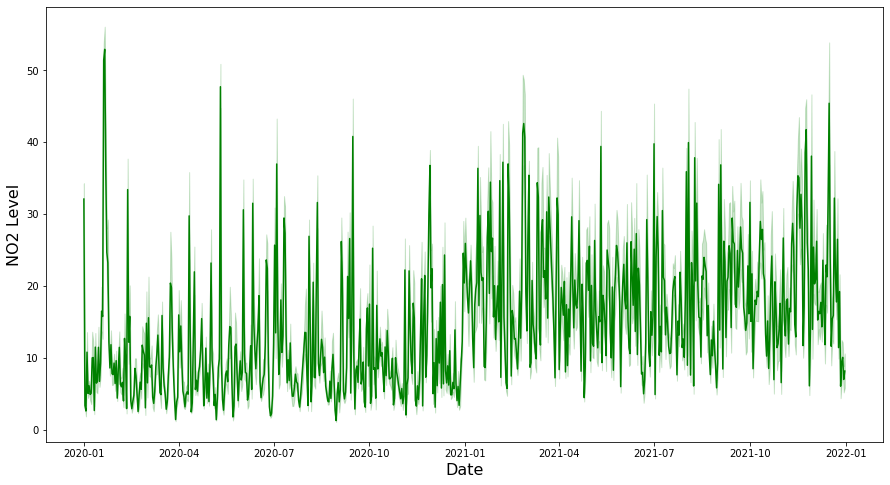

In [190]:
no2_data = np.array(concated_df['NO2 Level (V ug/m2)'])
dates_data = np.array(concated_df['Date'])

draw_line_plot(dates_data, no2_data, 'Date', 'NO2 Level','green')

Use group by 'Date' to get mean values for the NO2 level data and draw the line plot for mean values. 

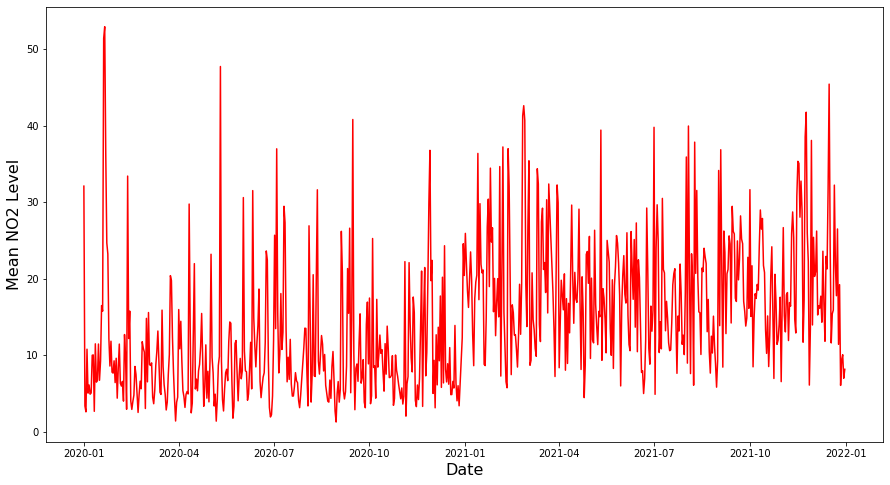

In [220]:
meanno2_data = concated_df.groupby(['Date'])['NO2 Level (V ug/m2)'].mean()
# print(meanrank_data)
labels = meanno2_data.keys()
draw_line_plot(labels, meanno2_data, 'Date', 'Mean NO2 Level','red')

Use group by 'Years' to get mean values for the NO2 level data and draw the line plot for mean values. 

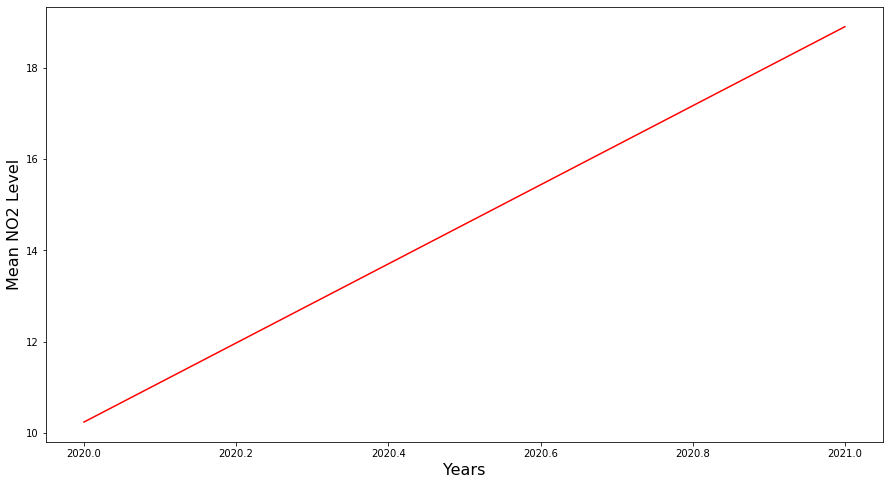

In [183]:
meanno2_data_byyears = concated_df.groupby(['Years'])['NO2 Level (V ug/m2)'].mean()
# print(meanrank_data)
labels = meanno2_data_byyears.keys()
draw_line_plot(labels, meanno2_data_byyears, 'Years', 'Mean NO2 Level','red')

Use group by 'Date' to get median values for the NO2 level data and draw the line plot for median values. 

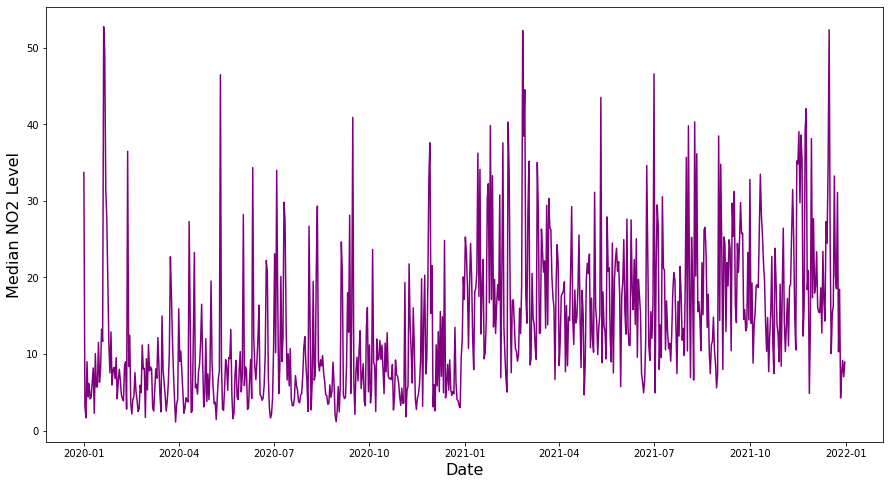

In [184]:
meanno2_data_median = concated_df.groupby(['Date'])['NO2 Level (V ug/m2)'].median()
# print(meanrank_data)
labels = meanno2_data_median.keys()
draw_line_plot(labels, meanno2_data_median, 'Date', 'Median NO2 Level','purple')

Use group by 'Years' to get median values for the NO2 level data and draw the line plot for median values. 

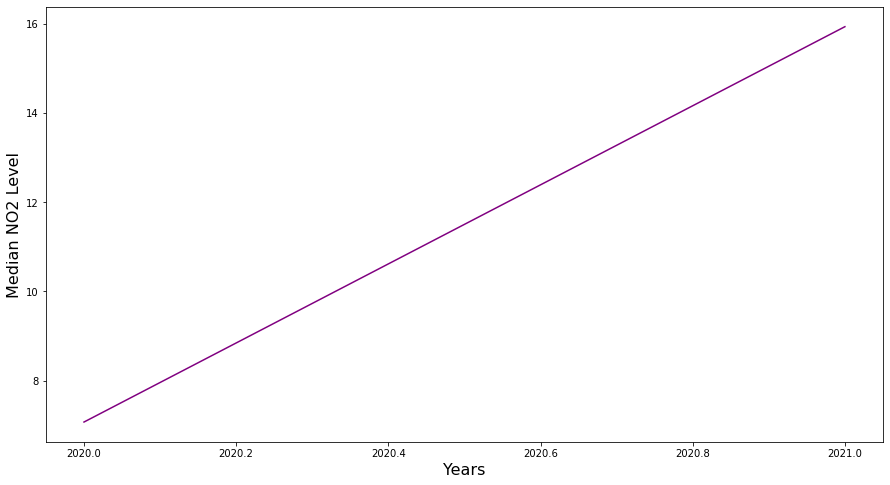

In [221]:
meanno2_data_median = concated_df.groupby(['Years'])['NO2 Level (V ug/m2)'].median()
# print(meanrank_data)
labels = meanno2_data_median.keys()
draw_line_plot(labels, meanno2_data_median, 'Years', 'Median NO2 Level','purple')

Next, I try to find out what the highest and lowest of NO2 level in the whole dataset.

In [188]:
# find the years with the biggest and lowest no2 level
nparray_no2level = np.array(concated_df['NO2 Level (V ug/m2)'])
nparray_date = np.array(concated_df['Date'])

# get the max and min No2 level
max_level = np.max(nparray_no2level)
min_level = np.min(nparray_no2level)

# get the index of max and min No2 level  
max_index = np.where(nparray_no2level == max_level)
min_index = np.where(nparray_no2level == min_level)

# get the year of max and min from the max , min No2 level index
max_date = nparray_date[max_index][0] 
min_date = nparray_date[min_index][0] 
print("The NO2 level was highest at", "{:10.2f}".format(max_level), "in the date", max_date)
print("The NO2 level was lowest at", "{:10.2f}".format(min_level), "in the date", min_date)


The NO2 level was highest at      82.60 in the date 2021-11-29T00:00:00.000000000
The NO2 level was lowest at      -0.78 in the date 2021-10-27T00:00:00.000000000


Let's have a look if the highest and lowest NO2 points are at the correct place.

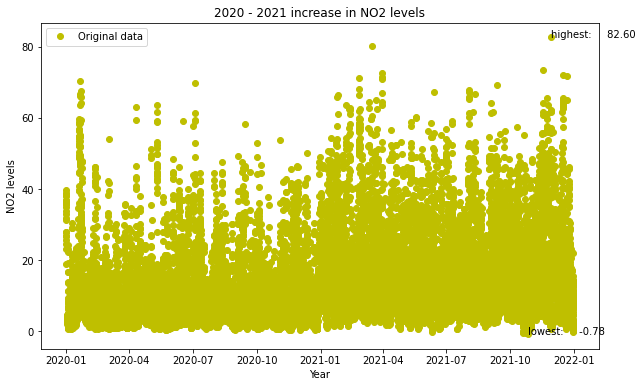

In [194]:
# give the highest and lowest NO2 levels labels
label_max = "highest:"+"{:10.2f}".format(max_level)
label_min = "lowest:"+"{:10.2f}".format(min_level)

# Plotting
plt.figure(figsize=(10,6))
# original data
plt.plot(nparray_date, nparray_no2level, 'o', color = 'y', label='Original data')

plt.legend()
plt.xlabel("Year")
plt.ylabel("NO2 levels")
plt.title("2020 - 2021 increase in NO2 levels")
ax = plt.gca()
ax.annotate(label_max, xy=(max_date, nparray_no2level[max_index]))
ax.annotate(label_min, xy=(min_date, nparray_no2level[min_index]))

plt.show()


## Pearson correlation coefficient

The function cal_coef() below is for calculating correlation coefficient matrix value.

Use numpy corrcoef() function to get the correlation coefficient matrix.

Correlation coeffcients are used to measure the strength of the linear relationship between variables. I use numpy corrcoef() function to get the correlation coefficient matrix.

A correlation coefficient > 0 indicates a positive relationship while a value < 0 signifies a negative relationship.

correlation coefficient = 0 indicates no relationship between the two variables being compared.

Test and check if it's correct correlation coefficient value.

In [222]:
# Pearson correlation coefficient
def cal_coef(df,col1,col2):
  #Calculate the Pearson correlation coefficient between year and the rise in sea level.
  # (Expected output: 0.98 when rounded to 2 decimal places)
  nparray_col1 = np.array(df[col1])
  nparray_col2 = np.array(df[col2])
  coef = np.corrcoef(nparray_col1,nparray_col2).round(decimals=2)
  return coef



Let's have a look what the relationship between Years and NO2 Level. We won't be able to use Date and NO2 Level to calculate correlation coefficient, as Date is in datetime type. 

In [223]:
col1 = 'Years'
col2 = 'NO2 Level (V ug/m2)'
coef_matrix = cal_coef(concated_df, col1, col2) 
print(f'correlation coefficient for {col1} and {col2} :\n',coef_matrix)

correlation coefficient for Years and NO2 Level (V ug/m2) :
 [[1.   0.36]
 [0.36 1.  ]]


In [224]:
# The code below will run and test your code to see if you have returned a series with the correct length and first row
actual = coef_matrix[0,1]
expected = 0.36

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed","Should have got", expected, "got", actual)

Test passed 0.36


From the correlation coefficient matrix, we can see the relationship between Years and NO2 level is a positive relationship, but the strength of the linear relationship is not very high. 

## Linear Regression

Using linregress from scipy.stats to find the best fit

Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "NO2 Level" column as the y-axix.

Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the NO2 level rise in 2050.

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the NO2 level rise in 2050 if the rate of rise continues as it has since the year 2000.

The x label should be "Year", the y label should be "NO2 Level (V ug/m2)", and the title should be "Rise in NO2 Level".

### **Building Linear Regression with Years**

The function draw_scatter_plot() below is for creating a scatter plot by passing in a dataframe, col1 name, col2 name, title of the plot, and the colors you would like it to choose by the column.  Let's draw a scatter plot to have a look what the Years and NO2 Level data look like before we're building the linear regression model. 

In [ ]:
def draw_scatter_plot(df, col1, col2, title, colorbycol):
  col1_values = df[col1]
  col2_values = df[col2]

  plt.figure(figsize=(10, 8), dpi=80)
  plt.scatter(col1_values, col2_values, edgecolors='face', c=df[colorbycol], cmap='plasma')
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.title(title)
  plt.show()

This scatter chart shows the NO2 level rise each year. 

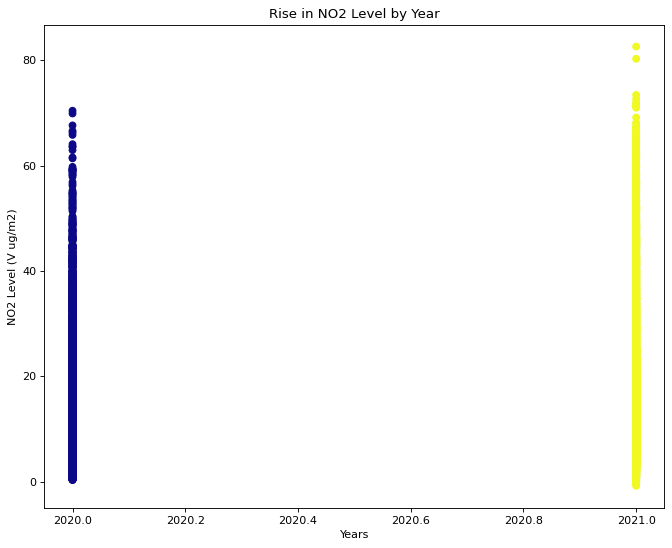

In [176]:
# plt.figure(figsize=(10, 8), dpi=80)
# plt.scatter(year_arr, no2_level_arr, c='red' , edgecolors='lightgreen') 
# plt.xlabel('Years')
# plt.ylabel('NO2 Level (V ug/m2)')
# plt.title('Rise in NO2 Level')
# plt.show()
draw_scatter_plot(concated_df, 'Years', 'NO2 Level (V ug/m2)', 'Rise in NO2 Level by Year', 'Years')

This scatter chart shows the NO2 level rise each the Date. 

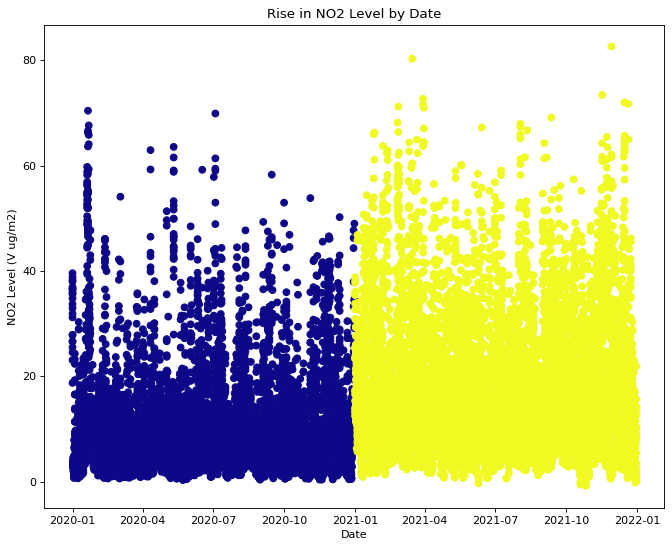

In [178]:

draw_scatter_plot(concated_df, 'Date', 'NO2 Level (V ug/m2)', 'Rise in NO2 Level by Date', 'Years')

I will conver the 'NO2 Level (V ug/m2)' column data into float type and 'Years' data into interger 64 type and we will use them for later. 

In [156]:
no2_level_arr = np.array(concated_df['NO2 Level (V ug/m2)'], np.float64)
year_arr = np.array(concated_df['Years'],np.int64)

We will use scipy.stats's linear to create a linear regression model. We can then use this linear regression model to predict the NO2 levels trend in the future. 

First of all, we need to get the slope, intercept, R-value, and P-value from the linear regression model.  The idea is linear regression uses, y = x * slope + intercept , where x is the slope/gradient of the line. Using this we can find y for any x.

In [135]:
# Create first line of best fit
lineA = linregress(year_arr, no2_level_arr)
slope = lineA.slope
intercept = lineA.intercept

print(lineA)
print("Slope = ", slope)
print("Intercept = ", intercept)
print(f"R-squared = {lineA.rvalue**2:.4f}")
print("P-value = ", lineA.pvalue)

LinregressResult(slope=8.65701411659012, intercept=-17476.927215221996, rvalue=0.35958618734656383, pvalue=0.0, stderr=0.17423326564393585)
Slope =  8.65701411659012
Intercept =  -17476.927215221996
R-squared = 0.1293
P-value =  0.0


The function predict_no2_level() below is using the formula y = x * slope + intercept , where x is the slope/gradient of the line. Using this we can find y for any x. s is slope. i presents intercept.

In [136]:
# Predict NO2 Level from 2020 to 2049
def predict_no2_level(s , x, i):
  y = s * x + i
  return y

Let's draw a linear fit line for years and the linear regression model y prediction values. 

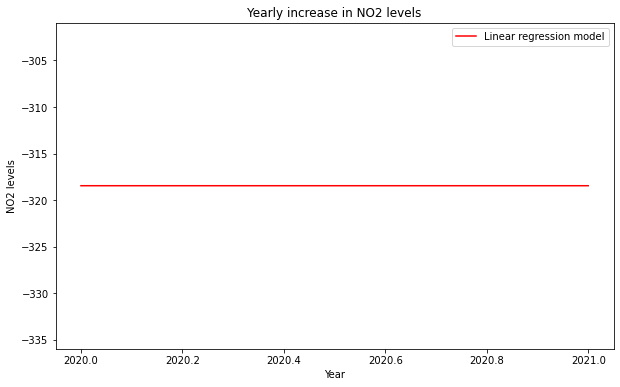

In [201]:

plt.figure(figsize=(10,6))
# plt.plot(year_arr, no2_level_arr, 'o', color = 'g', label='original data')
plt.plot(year_arr, predict_no2_level(slope, year_arr, intercept), 'r', label='Linear regression model')
plt.legend()
plt.xlabel('Year')
plt.ylabel('NO2 levels')
plt.title('Yearly increase in NO2 levels')
plt.show()


The linear regression line above is really flat. Let's predict further. The code below will generate the predicted NO2 level values for each year from 2022 to 2050 by excuting the function predict_no2_level() . I will save the them to a new dataframe called df_pred.   

In [138]:
#predict NO2 level for years 2022 to 2050 using linear regression
rows =[]
for i in range(2022, 2051):
  rows.append([i,predict_no2_level(slope , i, intercept)])

df_pred = pd.DataFrame(rows, columns=["Year", "predicted_no2_level"])

print(df_pred)

    Year  predicted_no2_level
0   2022            27.555329
1   2023            36.212343
2   2024            44.869357
3   2025            53.526371
4   2026            62.183385
5   2027            70.840399
6   2028            79.497413
7   2029            88.154427
8   2030            96.811441
9   2031           105.468456
10  2032           114.125470
11  2033           122.782484
12  2034           131.439498
13  2035           140.096512
14  2036           148.753526
15  2037           157.410540
16  2038           166.067554
17  2039           174.724569
18  2040           183.381583
19  2041           192.038597
20  2042           200.695611
21  2043           209.352625
22  2044           218.009639
23  2045           226.666653
24  2046           235.323667
25  2047           243.980681
26  2048           252.637696
27  2049           261.294710
28  2050           269.951724


I will take out the series Year data and transform to a numpy array in integer type and i will do the same for the predicted NO2 level values to float type. 

In [ ]:
# Create first line of best fit
# xA = np.arange(2022,2050,1)
# yA = xA * lineA.slope + lineA.intercept

In [139]:
# extract the predicted years , NO2 leavels and save them into array variables.
pred_year_arr = np.array(df_pred["Year"],np.int64)
pred_no2_level_arr = np.array(df_pred["predicted_no2_level"],np.float64)

Then append the seprated predicted array to the original data array and save to new variables.  So, append the predicted years to original years data and append the predicted NO2 leavel array to original NO2 level data. 

In [140]:
# append the predicted years to original years data
new_year_arr = np.append(year_arr, pred_year_arr, axis = 0)
# append the predicted NO2 leavel array to original NO2 level data
new_no2_level_arr = np.append(no2_level_arr, pred_no2_level_arr, axis = 0)

In this code cell, I'm drawing the original and prediction data together by passing in the two near arrays and also, label the numbers on the chart by using the gca annotate() method.  

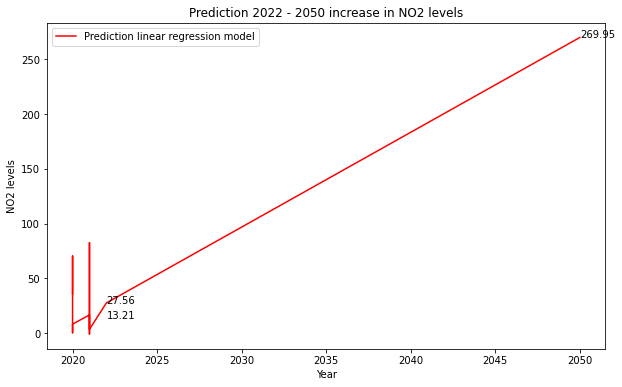

In [202]:

label1 = "{:.2f}".format(pred_no2_level_arr[0])
label2 = "{:.2f}".format(no2_level_arr[133])
label3 = "{:.2f}".format(pred_no2_level_arr[28])

plt.figure(figsize=(10,6))
# original data
# plt.plot(year_arr, no2_level_arr, 'o', color = 'b', label='Original data')
# original + prediction data
plt.plot(new_year_arr, new_no2_level_arr, 'r', label='Prediction linear regression model')
plt.legend()
plt.xlabel("Year")
plt.ylabel("NO2 levels")
plt.title("Prediction 2022 - 2050 increase in NO2 levels")
ax = plt.gca()
ax.annotate(label1, xy=(2022, pred_no2_level_arr[0]))
ax.annotate(label2, xy=(2022, no2_level_arr[133]))
ax.annotate(label3, xy=(2050, pred_no2_level_arr[28]))
plt.show()



### **Build Linear Regression with Date**

Linear regression is always a handy option to linearly predict data. If you use pandas to handle your data, you know that, pandas treat date default as datetime object. However, the datetime object cannot be used as numeric variable for regression analysis. 

Whatever regression we apply, datetime object cannot be used as numeric value. The idea to avoid this situation is to make the datetime object as numeric value. Then do the regression. 

During plotting the regression and actual data together, make a common format for the date for both set of data. In this case, I have made the data for x axis as datetime object for both actual and regression value.

I can see the data seems not distriute very well in the charts i produced, becuase I used only years column and the air quality values are acrossed everyday. I'm going to use the date column instead of years since the data contains dates.  

In [142]:
concated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16626 entries, 0 to 8758
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 16626 non-null  datetime64[ns]
 1   Time                 16626 non-null  object        
 2   NO2 Level (V ug/m2)  16626 non-null  float64       
 3   Weekdays             16626 non-null  int64         
 4   Years                16626 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 779.3+ KB


Set Date column as the index.

In [143]:
new_concated_df = concated_df.copy()

In [144]:
new_concated_df.set_index('Date', inplace=True)

In [145]:
new_concated_df.head()

,Time,NO2 Level (V ug/m2),Weekdays,Years
Date,,,,
2020-01-01,01:00:00,35.65193,2,2020
2020-01-01,02:00:00,37.99122,2,2020
2020-01-01,03:00:00,35.70462,2,2020
2020-01-01,04:00:00,36.57960,2,2020
2020-01-01,05:00:00,32.94410,2,2020


‘y’ variable represents all data without NaN values. 

Corresponding dates are saved in ‘x’ variable. All dates are passed through pandas ‘to_datetime()’ function to convert it to float numeric for the regression purpose. 

In [226]:
## x = np.array(pd.to_datetime(df['NO2 Level (V ug/m2)'].dropna()).index.values, dtype=float)
# x_year = np.array(pd.to_datetime(new_concated_df['NO2 Level (V ug/m2)'].dropna().index.values), dtype=float)
# x=np.array(pd.to_datetime(df[‘total_cases_per_million’].dropna().index.values), dtype=float)
y_no2 = np.array(new_concated_df['NO2 Level (V ug/m2)'].values)
x_year = np.array(new_concated_df['NO2 Level (V ug/m2)'].index.values, dtype=float)

# print(y_no2)
print(min(x_year),max(x_year))



1.5778368e+18 1.6409088e+18


Now our xy data are ready to pass through the linear regression analysis. We will use ‘linregress’ function from SciPy statistics package for the linear regression. The final output from linear regression are saved in slop, intercept, r_value, p_value, std_err varibles. Now we will predict some y values within our data range. We will also save the unix numeric date values in different variables as datetime object. As our actual data set’s date are in datetime object format.

In [160]:
slope, intercept, r_value, p_value, std_err = sp.linregress(x_year,y_no2)
# print(slope , intercept)
# all the years to predict
xf = np.linspace(min(x_year),max(x_year),100)

# made a copy of the years in float type then convert to datetime
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)

# calculate the prediction data.
yf = (slope * xf) + intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.3136620786132727 
 p =  0.0 
 s =  4.858318816110829e-18


In [227]:
print(xf1)

DatetimeIndex([          '2020-01-01 00:00:00',
               '2020-01-08 08:58:10.909090816',
               '2020-01-15 17:56:21.818181888',
               '2020-01-23 02:54:32.727272704',
               '2020-01-30 11:52:43.636363520',
               '2020-02-06 20:50:54.545454592',
               '2020-02-14 05:49:05.454545408',
               '2020-02-21 14:47:16.363636480',
               '2020-02-28 23:45:27.272727296',
               '2020-03-07 08:43:38.181818112',
               '2020-03-14 17:41:49.090909184',
                         '2020-03-22 02:40:00',
               '2020-03-29 11:38:10.909090816',
               '2020-04-05 20:36:21.818181888',
               '2020-04-13 05:34:32.727272704',
               '2020-04-20 14:32:43.636363520',
               '2020-04-27 23:30:54.545454592',
               '2020-05-05 08:29:05.454545408',
               '2020-05-12 17:27:16.363636480',
               '2020-05-20 02:25:27.272727296',
               '2020-05-27 11:23:38.1818

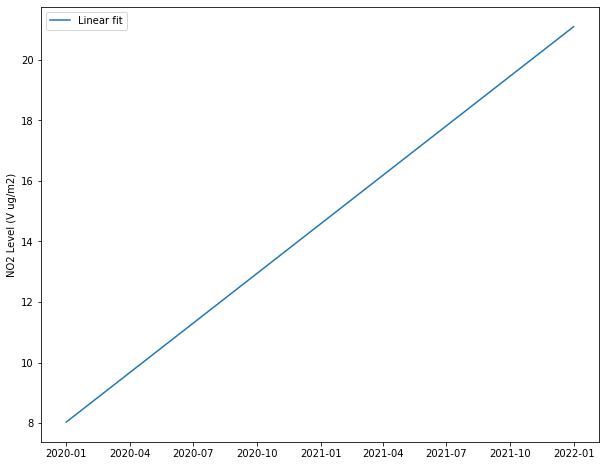

In [229]:

f, ax = plt.subplots(1, 1, figsize=(10,8))
ax.plot(xf1, yf, label = 'Linear fit')#, lw=3)
# new_concated_df['NO2 Level (V ug/m2)'].dropna().splot() #(ax=ax, marker='o', ls='')  
plt.ylabel('NO2 Level (V ug/m2)')
ax.legend();

# Conclusion

What are the stand out things you have found through your coded analysis?

It's cruitial when you're evaluating the NO2 level in each day or each year. The NO2 level values are for each date, we should use dates to calculate the correlation coefficient but dates are in datetime type. We can't use it, so i have to use Years. 

From the correlation coefficient matrix, we can see the relationship between Years and NO2 level is a positive relationship, but the strength of the linear relationship is not very high.  The p-value =  0.0 < 0.05 which means years and NO2 level has significant relationships.  From the Linear regression for the dates and NO2 level results, we can see the prediction values are getting higher each year. 

I will say this linear regression model predict very well.  The probability of the NO2 level rise each day is really high. Therefore, it will be helpful for the government / local council to understand the air quality at the surrounding areas and to think about their strategies or solutions for such important issue.


# Reflection

**What skills have you demonstrated in completing this notebook?**

Your answer: 

The skills I've used in the projects are retrieving data, processing , cleaning(drop rows/columns), formating (data types, rename column), sorting values(sort_by() function), wrangling data with pandas libraries. I also pandas's concatenate function.concat() to merge two sets of data. 

Also, I've used Numpy's functions such as numpy array function to transform data series to a numpy array for later's calculation,  mean(), sum(), stdev() functions to calculate basic statistics, changing data type.  

I calculated correlation coefficient matrix with np.corrcoef() function and created Linear Regression model with linregress from scipy.stats package to find the best fit line.  

Finally, I used mapplotlib.pyplot and seaborn to draw the charts for the linear regression model.


**What problems did you encounter and how did you solve them?**

Your answer: 

The most tricky parts are processing dataset and what data i could choose. I could have created a pivot table with .pivot_table() to see data clearly. Also, the part to create the prediction data and draw the predicted linear regression trend line on the chart. I asked team members and search information online. 

# Helpful references
---
Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition) 

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.
